In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.preprocessing.image import ImageDataGenerator

import pandas as pd

In [ ]:

from tensorflow.keras.applications import VGG16

pre_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Make all the layers in the pre-model non-trainable
for layer in pre_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:

last_layer = pre_model.get_layer('block5_conv3')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 9, 9, 512)


In [ ]:
loss = 'mean_squared_error'
metrics = ['mse','mae']
batch_size=64
epochs = 4

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.4)(x)                  
# Add a final linear layer for classification
x = layers.Dense  (1, activation='linear')(x)           

model = Model( pre_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.001), 
              loss = 'mean_squared_error',
              metrics = metrics) 

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDSS.csv")
train_df = raw_dataset.copy()
train_df.head()

,img_path,z
0,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.037450
1,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
2,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.029610
3,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.002882
4,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.038340


In [ ]:
import numpy as np
cnt=0
for row in train_df['z']:
    try:
        if row==-99.990000 or row==-100.000000 :
          train_df.loc[cnt, 'z']=np.nan
    except ValueError:
        pass
    cnt+=1

In [ ]:
train_df.isna().sum()

img_path       0
z           1357
dtype: int64

In [ ]:
median = train_df['z'].median()
train_df['z'].fillna(median, inplace=True)

In [ ]:
train_df.isna().sum()

img_path    0
z           0
dtype: int64

In [ ]:
dataset=train_df.copy()

In [ ]:
train_df = dataset.sample(frac=0.8, random_state=0)
test_df = dataset.drop(train_df.index)

In [ ]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.30,
            fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="training",
            batch_size=32,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="validation",
            batch_size=32,
            seed=42,
            class_mode="other",
            target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col="img_path",
            y_col=None,
            batch_size=batch_size,
            seed=42,
            class_mode=None,
            target_size=(150,150))           

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 2497 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 1069 validated image filenames.
Found 892 validated image filenames.


In [ ]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')


In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=20,
                    steps_per_epoch=20,
                    verbose=1,
                    callbacks=[earlystopper])

Epoch 1/20
20/20 [==============================] - 759s 39s/step - loss: 3082.6395 - mse: 3082.6395 - mae: 21.6962 - val_loss: 1.1271 - val_mse: 1.1271 - val_mae: 0.9688
Epoch 2/20
20/20 [==============================] - 416s 21s/step - loss: 5.7128 - mse: 5.7128 - mae: 1.8464 - val_loss: 1.5339 - val_mse: 1.5339 - val_mae: 1.2135
Epoch 3/20
20/20 [==============================] - 397s 20s/step - loss: 2.9398 - mse: 2.9398 - mae: 1.3618 - val_loss: 0.3144 - val_mse: 0.3144 - val_mae: 0.5395
Epoch 4/20
20/20 [==============================] - 394s 20s/step - loss: 0.3162 - mse: 0.3162 - mae: 0.4465 - val_loss: 0.0294 - val_mse: 0.0294 - val_mae: 0.0542
Epoch 5/20
20/20 [==============================] - 392s 20s/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1071 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.0230
Epoch 6/20
20/20 [==============================] - 390s 20s/step - loss: 0.0284 - mse: 0.0284 - mae: 0.0514 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0156
Epoch 7/2

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,1227.036377,1227.036377,9.914561,1.127093,1.127093,0.968840,0
1,4.924809,4.924809,1.756945,1.533922,1.533922,1.213537,1
2,2.476662,2.476662,1.176872,0.314373,0.314373,0.539457,2
3,0.201990,0.201990,0.353260,0.029426,0.029426,0.054233,3
4,0.013038,0.013038,0.085337,0.026891,0.026891,0.023019,4
5,0.061606,0.061606,0.041533,0.026535,0.026535,0.015612,5
6,0.070892,0.070892,0.052037,0.026843,0.026843,0.021264,6
7,0.198229,0.198229,0.121880,0.026717,0.026717,0.018386,7


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [z]')
  plt.legend()
  plt.grid(True)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Err [z]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Err [$z^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()



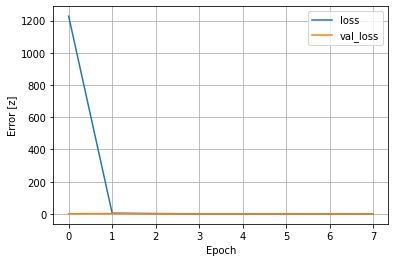

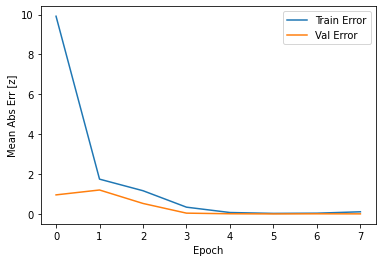

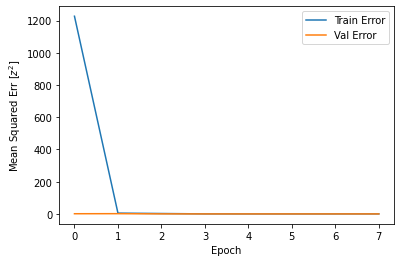

In [ ]:
plot_loss(history)

In [ ]:
model.save("Zmodel_vgg")

INFO:tensorflow:Assets written to: Zmodel_vgg/assets


In [ ]:
test_features = test_df.copy()
test_labels = test_features.pop('z')

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/Vggpredictions', test_predictions)

In [ ]:
test_predictions = model.predict(test_generator).flatten()


In [ ]:
test_predictions

array([ 0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.00829904,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.00830792,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.00427172,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,
        0.0083287 ,  0.0083287 ,  0.0083287 ,  0.0083287 ,  0.00

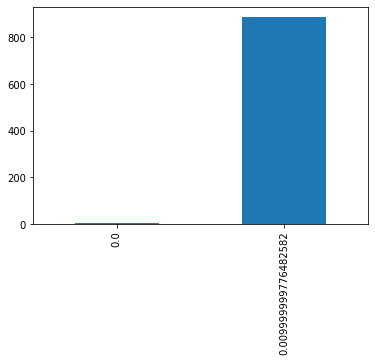

In [ ]:
fig1 = plt.gcf()
pd.value_counts(test_predictions.round(2)).sort_index().plot(kind="bar")

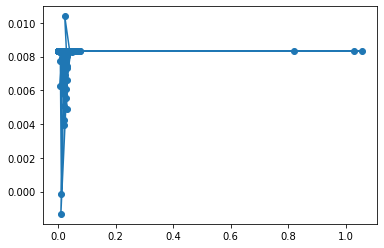

In [ ]:
plt.scatter(test_labels, test_predictions )
plt.plot(test_labels, test_predictions)

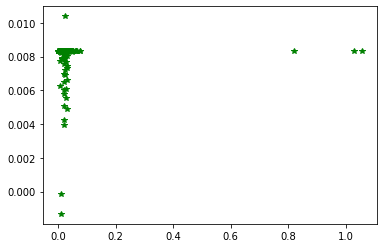

In [ ]:
plt.plot(test_labels, test_predictions,'*g')

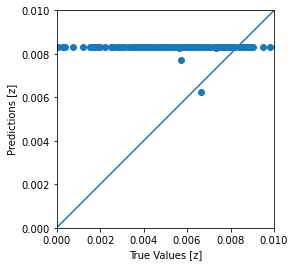

In [ ]:

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [z]')
plt.ylabel('Predictions [z]')
lims = [0, 0.01]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions = np.load('/content/drive/MyDrive/Colab Notebooks/Vggpredictions.npy')

In [ ]:
spec=test_labels.to_numpy()

In [ ]:
type(spec)

numpy.ndarray

In [ ]:
type(test_predictions)

numpy.ndarray

In [ ]:
outlier=(spec-test_predictions)/(1+spec)

In [ ]:
outlier


array([ 2.80700797e-02,  9.59758788e-03,  1.21591240e-02,  9.07199990e-03,
        4.61135658e-03,  5.00012288e-02,  3.39142111e-03,  5.45568838e-03,
        1.04140619e-02,  1.21881793e-02,  6.77820768e-03,  1.21591240e-02,
       -3.32112007e-03,  1.21591240e-02, -1.85869235e-03, -2.31082161e-03,
        3.67881474e-02,  1.83238127e-02,  1.21591240e-02,  9.52948756e-03,
       -1.85471064e-03,  8.95512681e-03,  9.73376043e-03,  1.21591240e-02,
        9.58785983e-03,  1.21591240e-02,  1.21591240e-02,  1.21591240e-02,
        1.21591240e-02,  8.34109049e-03,  3.34008360e-02,  4.80100684e-02,
        1.76352057e-02,  8.57509878e-03,  1.21591240e-02,  9.46137787e-03,
        1.46689314e-02,  3.80495981e-03,  1.21591240e-02,  3.27318377e-02,
        1.60534985e-02,  4.43445451e-03,  1.21591240e-02,  1.21591240e-02,
        1.15587423e-02,  1.28554268e-02,  1.27201114e-02,  1.61336690e-02,
        1.16265639e-02, -4.06743359e-03,  1.21591240e-02,  1.90209988e-02,
        1.21591240e-02,  

In [ ]:
f=pd.DataFrame(outlier)

In [ ]:
f[0].median()

0.012159123986981065